# Fashion MNIST

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split , StratifiedKFold
from sklearn.feature_selection import RFECV
import matplotlib as mpl
import matplotlib.pyplot as plt

In [ ]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

## DATA PREPARATION & VISUALIZATION 

In [2]:
# Dictionary of class labels
class_labels = {
     "T-shirt/top" : 0,
     "Trouser" : 1,
     "Pullover" : 2,
     "Dress" : 3,
     "Coat" : 4,
     "Sandal" : 5,
     "Shirt" : 6,
     "Sneaker" : 7,
     "Bag" : 8,
     "Ankle boot" : 9
}

In [3]:
train = pd.read_csv("C:\\Users\\Nezrin-pc\\Downloads\\Assignment 2\\train.csv", index_col = [0])
test = pd.read_csv("C:\\Users\\Nezrin-pc\\Downloads\\Assignment 2\\test.csv", index_col = [0])
train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,...,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000,30001.000000
mean,4.499250,0.001467,0.005533,0.029532,0.093030,0.231959,0.376387,0.715143,2.100797,5.744109,...,34.553682,23.386120,16.435519,17.490417,22.244692,17.717409,8.533482,2.792840,0.892404,0.072564
std,2.877095,0.130886,0.209371,0.692864,2.196887,4.016810,5.382279,7.411279,13.624316,24.043992,...,57.342219,48.750179,41.488006,43.295240,50.923072,44.900999,29.485661,17.452495,9.583668,2.019695
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,58.000000,10.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,9.000000,16.000000,16.000000,78.000000,164.000000,217.000000,230.000000,213.000000,255.000000,254.000000,...,255.000000,255.000000,254.000000,255.000000,255.000000,255.000000,250.000000,255.000000,255.000000,170.000000


In [4]:
# Sample the train and test dataset
train_reduced = train.sample(frac = 0.10, replace = False, random_state = 1)
test_reduced = test.sample(frac = 0.10, replace = False, random_state = 1)

### a)  Split your data into X and y:

In [5]:
# Split the data, train_y is a dataset target
train_x_a = pd.DataFrame(train_reduced)
train_x_a = train_x_a.drop("label", axis=1)
train_y = pd.DataFrame(train_reduced.label)

test_x = pd.DataFrame(test_reduced)
test_x = test_x.drop("label", axis=1)
test_y = pd.DataFrame(test_reduced.label)
train_x_a.head(3)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
10747,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12573,0,0,0,0,0,0,0,0,0,2,...,89,45,0,0,0,0,0,0,0,0
29677,0,0,0,0,0,0,2,32,41,28,...,86,69,43,0,0,0,0,0,0,0


### b)  Visualizing the data:

In [6]:
def plot_image(row):
    n_images = len(row)
    columns = 10
    rows = n_images / columns
    fig=plt.figure(figsize=(columns*2, rows*2))
    for i in range(n_images):
        img = row[i].reshape(28,28)
        fig.add_subplot(rows, columns, i+1)
        plt.imshow(img, cmap='gray')
        plt.axis('off')
    plt.show()

### c) Class visualization:

{'T-shirt/top': 0, 'Trouser': 1, 'Pullover': 2, 'Dress': 3, 'Coat': 4, 'Sandal': 5, 'Shirt': 6, 'Sneaker': 7, 'Bag': 8, 'Ankle boot': 9}


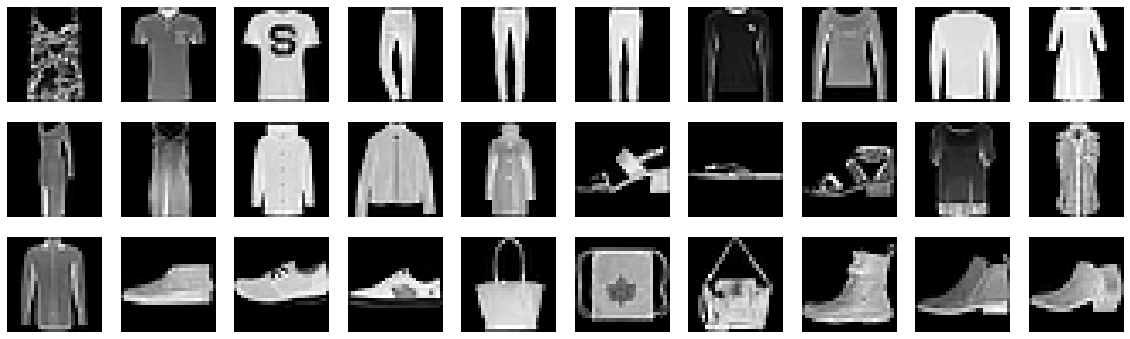

In [7]:
instances = []
# Take 3 of each class labels
for k in class_labels.values(): # for each class - values of dictionary
    index = np.where(train_y == k)
    row = np.take(train_x_a.values, index[0][:3], axis=0) # 1st 3 instances
    instances = instances + [x for x in row]


print(class_labels)
plot_image(instances)

### d) Average visualization:

In [8]:
classes = []
for i in range(0, len(class_labels)):
    classes.append(i)
classes

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [9]:
# Dataset for each class
def index_of_classes(index):
    return(train_y.loc[train_y['label']==classes[index]].index.tolist())
index_of_classes(0) # T-Shirts

[21098,
 5120,
 13638,
 7526,
 17945,
 4984,
 21382,
 6141,
 6273,
 1759,
 1603,
 13969,
 19289,
 18583,
 14878,
 19976,
 7962,
 22920,
 25937,
 9300,
 21876,
 16294,
 18145,
 27498,
 11600,
 183,
 28556,
 102,
 17396,
 10817,
 7119,
 21965,
 16664,
 3551,
 5191,
 15575,
 7342,
 23821,
 9190,
 1860,
 3629,
 11893,
 29485,
 13204,
 15366,
 29022,
 26964,
 18607,
 7073,
 26461,
 5417,
 20514,
 15231,
 19668,
 20068,
 10622,
 28522,
 4679,
 21655,
 13283,
 1303,
 15233,
 10654,
 692,
 23722,
 14788,
 6249,
 3550,
 2156,
 13698,
 29045,
 7855,
 17255,
 17795,
 17001,
 26923,
 11271,
 13789,
 20671,
 28374,
 29832,
 23968,
 8018,
 14447,
 5531,
 1685,
 18433,
 15873,
 7767,
 25927,
 5854,
 21298,
 21513,
 18306,
 13953,
 21786,
 25519,
 13814,
 16444,
 24936,
 14737,
 7504,
 18441,
 8632,
 16590,
 8762,
 13224,
 5551,
 11087,
 21627,
 20947,
 16267,
 2888,
 23975,
 24426,
 24794,
 2786,
 20629,
 18094,
 23401,
 15196,
 20382,
 8618,
 9369,
 27463,
 4068,
 5344,
 11233,
 5674,
 24890,
 22829

In [10]:
# Mean of each pixel for class
def class_mean(index):
    return(train_x_a.loc[index_of_classes(index)].mean())
class_mean(0)

pixel1        0.000000
pixel2        0.022472
pixel3        0.089888
pixel4        0.250936
pixel5        0.453184
pixel6        0.340824
pixel7        1.790262
pixel8        7.400749
pixel9       21.546816
pixel10      41.179775
pixel11      57.074906
pixel12      70.767790
pixel13      62.048689
pixel14      44.202247
pixel15      42.235955
pixel16      50.074906
pixel17      67.981273
pixel18      70.820225
pixel19      52.838951
pixel20      30.580524
pixel21      11.011236
pixel22       2.865169
pixel23       0.715356
pixel24       0.471910
pixel25       0.265918
pixel26       0.082397
pixel27       0.029963
pixel28       0.029963
pixel29       0.003745
pixel30       0.029963
               ...    
pixel755      1.419476
pixel756      0.846442
pixel757      0.000000
pixel758      0.018727
pixel759      0.348315
pixel760      0.498127
pixel761      1.067416
pixel762      2.872659
pixel763     11.172285
pixel764     39.790262
pixel765     71.089888
pixel766     83.303371
pixel767   

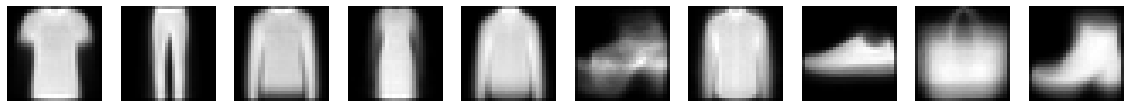

In [11]:
# Avg image for each class
for i in range (0, 10): # 9 classes
    class_index = pd.DataFrame([index_of_classes(i)])
class_mean = pd.DataFrame([class_mean(0), class_mean(1), class_mean(2), class_mean(3), class_mean(4), class_mean(5), class_mean(6), class_mean(7), class_mean(8), class_mean(9)]).to_numpy()
plot_image(class_mean)

## BINARY CLASSIFICATION

### e) Binary transformation:

In [12]:
# item is a piece of clothing
train_y_e = train_y.replace(to_replace = [0, 1, 2, 3, 4, 6], value = 1 )
# item is non-clothing
train_y_e = train_y_e.replace(to_replace = [5, 7, 8, 9], value = 0 )
train_y_e.head()

,label
10747,0
12573,1
29677,1
8856,0
21098,1


In [13]:
# item is a piece of clothing
test_y_e = test_y.replace(to_replace = [0, 1, 2, 3, 4, 6], value = 1 )
# item is non-clothing
test_y_e = test_y_e.replace(to_replace = [5, 7, 8, 9], value = 0 )
test_y_e.head()

,label
2764,1
4767,1
3814,0
3499,0
2735,1


### f) Binary Classification Model

In [14]:
# create model train it 
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression()
log_model.fit(train_x_a, train_y_e)

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


1.0


In [15]:
# perofrm 5 fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
train_accuracy = abs(cross_val_score(log_model, train_x_a, train_y_e, cv=5, scoring = 'accuracy'))
# print mean accuracy
print(train_accuracy.mean())

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-pack

0.9866705398255735


# g) Predict test data:

In [16]:
# train the model
test_y_pred = log_model.predict(test_x)
print(test_y_pred)

[1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1 1 0 1 1 1 0 1
 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 1 0 0 1 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 1 1 1 0 0 1 1 0 0 1 1 0 0 1 0
 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 1 1 1 0 0
 0 0 0 1 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 0 0 0 1 1
 0 0 0 0 1 0 0 1 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 0 0 1
 0 0 1 0 1 1 0 0 0 0 1 0 1 0 1 1 0 1 0 1 1 1 1 0 1 0 1 1 1 0 1 1 0 1 1 1 1
 0 1 0 0 0 1 1 1 1 1 1 0 1 0 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1
 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 1 1 1 1 0 1 1 0 0
 0 0 0 1 1 1 1 1 1 0 0 1 1 0 0 0 1 0 0 0 1 0 0 1 1 1 1 0 1 1 1 1 1 1 0 0 0
 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 0 1 1 1 1 0 1 0 0 

In [17]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [18]:
# plot confusion matrix
# print(accuracy, precision, recall, f1_score)
log_accuracy = accuracy_score(test_y_e, test_y_pred)
log_conf_matrix = confusion_matrix(test_y_e, test_y_pred)
log_precision = precision_score(test_y_e, test_y_pred, average='weighted')
log_recall = recall_score(test_y_e, test_y_pred, average='weighted')
log_f1_score = f1_score(test_y_e, test_y_pred, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print( log_conf_matrix)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_recall)
print("Logistic F1 Score: ", log_f1_score)

Logistic Accuracy:  0.984
[[202   1]
 [  7 290]]
Logistic Precision:  0.9843606767621961
Logistic Recall:  0.984
Logistic F1 Score:  0.9840348722013077


### h) Model evaluation:


In [19]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(test_y_e, test_y_pred)

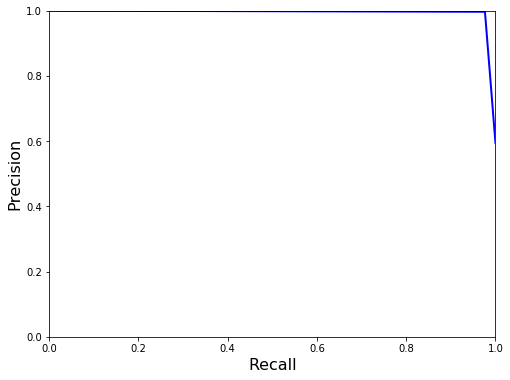

In [20]:
# plot precision-recall curve
def plot_precision_vs_recall(precisions, recalls):
    plt.plot(recalls, precisions, "b-", linewidth=2)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])

plt.figure(figsize=(8, 6))
plot_precision_vs_recall(precisions, recalls)
plt.show()


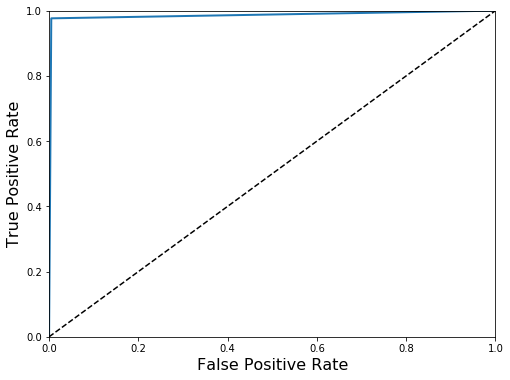

In [21]:
# plot ROC curve
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(test_y_e, test_y_pred)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)

plt.figure(figsize=(8, 6))
plot_roc_curve(fpr, tpr)
plt.show()

In [22]:
# print AUC score
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y_e, test_y_pred)

0.9857524340282962

### i) Learning curves:

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\valid

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\valid

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\valid

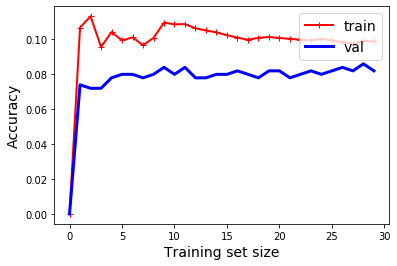

In [23]:
# plot learning curve
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
def plot_learning_curves(model, x, y):
    train_errors, val_errors = [], [],
    X_train, X_val, y_train, y_val = train_test_split(x, y, test_size = 0.2)
    for m in range(3, len(train_x_a), 100):
        model.fit(train_x_a[:m], train_y[:m])
        y_train_predict = model.predict(train_x_a[:m])
        y_val_predict = model.predict(test_x)
        train_errors.append(accuracy_score(y_train_predict, train_y_e[:m]))
        val_errors.append(accuracy_score(y_val_predict, test_y_e))
        
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("Accuracy", fontsize=14)              
plot_learning_curves(log_model, train_x_a, train_y_e)

## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

# j) Training and cross validating logistic regression:

In [24]:
# 3 fold Cross Validation on train_x_a and train_y
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs')
log_acc_score = abs(cross_val_score(log_reg, train_x_a, train_y, cv=3, scoring = 'accuracy'))
print(log_acc_score.mean())

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\skl

0.7936744697368944


C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


### k) testing logistic regression:

In [25]:
# fit model 
log_reg.fit(train_x_a, train_y)
print("Log_model Score: ", log_model.score(train_x_a, train_y))

# test model
test_y_pred = log_reg.predict(test_x)
print(test_y_pred)

# print accuracy and confusion matrix
log_accuracy = accuracy_score(test_y, test_y_pred)
log_conf_matrix = confusion_matrix(test_y, test_y_pred)
print("Logistic Accuracy: ", log_accuracy)
print( log_conf_matrix)

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Log_model Score:  0.9953333333333333
[1 6 9 5 3 6 2 7 6 9 9 7 9 6 8 3 6 0 6 3 1 6 9 5 3 6 8 5 7 6 2 7 3 3 0 5 2
 0 1 3 1 2 0 1 7 4 0 3 3 6 6 1 3 6 8 9 4 6 4 1 2 0 0 8 8 2 8 2 7 6 2 2 9 5
 2 3 4 5 3 7 3 6 6 8 2 0 4 4 8 2 0 4 3 8 4 5 3 8 6 7 1 4 5 5 4 0 7 8 1 5 5
 7 3 8 4 4 7 8 5 1 9 4 5 5 3 5 9 2 8 8 5 1 1 4 1 1 7 9 2 1 5 7 0 4 7 8 2 7
 8 7 9 4 0 6 3 0 7 7 9 2 4 8 9 2 6 1 6 5 7 7 8 9 6 4 8 1 4 7 7 6 2 0 4 5 7
 5 9 8 2 3 4 5 6 5 5 5 3 4 3 2 9 6 7 2 6 8 6 4 6 4 1 6 8 0 4 1 7 6 2 1 9 1
 6 3 8 8 8 1 8 8 9 1 6 1 9 7 5 9 4 8 0 9 6 7 2 0 2 4 4 7 6 3 6 2 9 5 7 2 4
 7 8 5 7 2 5 8 0 0 8 7 2 5 4 2 6 9 2 3 2 6 4 3 0 0 8 0 2 3 3 7 3 5 1 9 5 3
 5 7 4 5 3 6 7 9 7 8 1 7 2 9 4 6 9 2 9 6 2 2 3 9 0 8 3 2 0 5 6 4 5 4 6 0 2
 5 4 8 9 8 4 2 2 6 3 1 7 0 5 8 0 8 7 5 9 3 6 6 0 0 6 4 7 0 2 2 8 1 7 4 0 1
 4 5 4 6 6 6 9 8 0 3 3 7 5 0 2 1 0 1 2 9 8 6 3 2 9 6 3 9 2 1 3 6 8 2 1 5 5
 7 5 9 4 2 4 1 0 0 5 7 0 3 7 7 8 4 9 9 5 4 9 7 3 1 6 0 8 6 0 6 2 2 2 7 5 5
 1 7 1 0 2 0 4 6 8 5 4 7 3 2 5 6 4 6 6 5 9 8 6 7 5 2 0 5 4 7 5 

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [26]:
# Grid Search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier, OneVsOneClassifier

param_grid = [
        {'kernel': ['linear', 'rbf', 'poly'], 'C': [0.1, 0.5, 1., 5., 10.], 'tol': [0.0001, 0.001, 0.1], 'decision_function_shape': ['ovo', 'ovr']}
]

# Support Vector Classifier
svc_reg = SVC()
grid_svc = GridSearchCV(svc_reg, param_grid, cv=5, scoring = 'accuracy')
grid_svc.fit(train_x_a, train_y)

# Best accuracy and parameters
best_acc = grid_svc.best_score_
print(best_acc)

best_parameters = grid_svc.best_params_
print(best_parameters)

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1.0, 5.0, 10.0],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['linear', 'rbf', 'poly'],
                          'tol': [0.0001, 0.001, 0.1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

### m)Testing the best model:

In [38]:
# Recreate a model with the best parameters
svc_reg =  SVC(kernel = 'linear', C = 0.1, tol = 0.0001, decision_function_shape = 'ovo')
svc_reg.fit(train_x_a, train_y)

C:\Users\Nezrin-pc\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovo', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.0001, verbose=False)

In [39]:
# Predict
svc_pred = svc_reg.predict (test_x)
svc_pred

array([1, 6, 9, 5, 3, 6, 2, 7, 6, 9, 9, 7, 5, 0, 8, 3, 6, 6, 6, 3, 1, 6,
       9, 5, 3, 6, 8, 5, 7, 2, 2, 7, 3, 3, 0, 9, 2, 0, 1, 3, 1, 2, 0, 1,
       7, 3, 0, 3, 3, 3, 6, 1, 3, 6, 4, 9, 4, 6, 2, 1, 2, 0, 0, 8, 8, 2,
       5, 2, 9, 6, 2, 2, 9, 5, 2, 3, 4, 5, 3, 7, 3, 2, 6, 5, 2, 0, 4, 3,
       8, 2, 0, 4, 0, 8, 4, 5, 3, 8, 0, 7, 1, 4, 5, 7, 4, 0, 7, 8, 1, 7,
       5, 7, 3, 8, 4, 4, 7, 8, 7, 1, 9, 4, 5, 5, 3, 5, 9, 2, 8, 8, 5, 1,
       1, 6, 1, 1, 7, 9, 4, 1, 5, 7, 0, 4, 5, 8, 2, 7, 8, 7, 9, 4, 0, 6,
       3, 0, 7, 7, 9, 2, 2, 8, 9, 2, 6, 1, 0, 5, 7, 7, 8, 9, 6, 4, 8, 1,
       2, 7, 7, 6, 2, 0, 4, 9, 7, 5, 9, 5, 2, 3, 4, 7, 6, 5, 5, 9, 3, 4,
       3, 2, 9, 6, 7, 2, 6, 8, 4, 3, 6, 4, 1, 6, 8, 0, 4, 1, 7, 6, 2, 1,
       9, 1, 6, 3, 8, 0, 8, 1, 8, 8, 7, 1, 0, 3, 9, 7, 5, 9, 3, 8, 0, 9,
       6, 7, 2, 0, 2, 4, 4, 7, 6, 3, 0, 4, 9, 5, 7, 2, 2, 7, 8, 5, 7, 2,
       5, 8, 0, 0, 8, 7, 4, 5, 4, 2, 6, 9, 2, 3, 2, 6, 4, 3, 0, 0, 8, 0,
       2, 3, 2, 7, 3, 5, 1, 9, 5, 3, 5, 7, 4, 5, 3,

In [40]:
# Confusion Matrix
svc_cm = confusion_matrix (test_y, test_y_pred)
svc_cm

array([[31,  0,  2,  0,  0,  0, 13,  0,  1,  0],
       [ 0, 38,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0, 42,  1,  6,  0,  8,  0,  0,  0],
       [ 0,  3,  1, 42,  4,  0,  3,  0,  1,  0],
       [ 1,  0,  7,  2, 36,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  5,  3,  1],
       [10,  0,  1,  0,  5,  0, 29,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7,  0, 49,  1,  1],
       [ 0,  0,  1,  1,  0,  2,  0,  2, 42,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  2,  0, 41]], dtype=int64)

In [41]:
# Test Accuracy
test_accuracy = accuracy_score(test_y, test_y_pred)
test_accuracy

0.786

## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [26]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

param_grid={'min_samples_split' : [2,3,4],'max_depth': [2,4,10]}

tree = DecisionTreeClassifier()

grid_tree = GridSearchCV(tree, param_grid, cv=5, scoring = 'accuracy')
grid_tree.fit(train_x_a, train_y)
tree_preds = grid_tree.predict_proba(test_x)[:, 1]

In [27]:
best_acc = grid_tree.best_score_
print(best_acc)

best_parameters = grid_tree.best_params_
print(best_parameters)

0.712
{'max_depth': 10, 'min_samples_split': 2}


## o) Testing the best model:

In [28]:
# Recreate a model with the best parameters
tree =  DecisionTreeClassifier(max_depth = 10, min_samples_split = 4)
tree.fit(train_x_a, train_y_e)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=4,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [29]:
# Predict
tree_pred = tree.predict(test_x)
tree_pred

array([1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1,

In [30]:
# Confusion Matrix
tree_cm = confusion_matrix (test_y, test_y_pred)
tree_cm

array([[31,  0,  2,  0,  0,  0, 13,  0,  1,  0],
       [ 0, 38,  0,  0,  0,  0,  1,  0,  0,  0],
       [ 1,  0, 42,  1,  6,  0,  8,  0,  0,  0],
       [ 0,  3,  1, 42,  4,  0,  3,  0,  1,  0],
       [ 1,  0,  7,  2, 36,  0,  6,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 43,  0,  5,  3,  1],
       [10,  0,  1,  0,  5,  0, 29,  0,  2,  0],
       [ 0,  0,  0,  0,  0,  7,  0, 49,  1,  1],
       [ 0,  0,  1,  1,  0,  2,  0,  2, 42,  0],
       [ 0,  0,  0,  0,  0,  2,  0,  2,  0, 41]], dtype=int64)

In [31]:
# Test Accuracy 
test_accuracy = accuracy_score(test_y, test_y_pred)
test_accuracy

0.786